# 關於pandas
* 語法: import pandas as pd
* 讀取csv語法: pd.read_csv('檔案.csv')
* series(dataframe)的資料可以直接做動作，語法: dataframe.plot() 
* 轉成array的語法: 檔案=df.values
* 語法df.describe()  #統計數據大補帖
* sum(1)表示橫向(列)得總和。sum(0)是行的方向。即先raws在columns
.
* 排序的語法: df.sort_values(by=['總級分','評分標準'],ascending = False).head(20) by裏頭的東西是排序先後，先排總級分，在排評分標準。 而ascending=False表示由大到小，head(20)表示顯示前20列的東西。
.。
* 自訂dataframe的語法 : df = pd.DataFrame(array , columns=list)
* 合併df的語法: df=pd.concat(df的list,axis = 0) axis控制方向。
.
* df3.index = list('甲乙丙丁')  #改前排的名稱

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel('1.xlsx')

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,曾,9,10,15,10,13
1,黃,10,10,10,8,9
2,陳,13,15,8,11,14
3,劉,13,15,8,11,14
4,沈,10,10,8,9,14


In [5]:
cg = df.國文.values  #將series轉成陣列

(array([1., 2., 0., 0., 0., 2., 3., 0., 0., 1.]),
 array([ 9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6, 13.2, 13.8, 14.4, 15. ]),
 <a list of 10 Patch objects>)

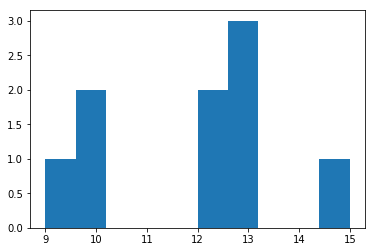

In [55]:
plt.hist(cg)

In [7]:
df.國文.mean()  #取平均
df.國文.std()  #取標準差

1.9002923751652296

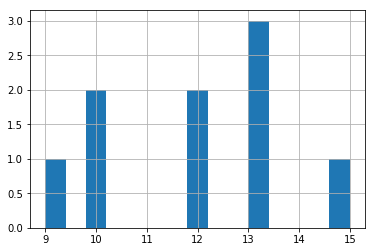

In [11]:
df.國文.hist(bins=15)  #直方圖，bins表示區間

In [8]:
df.describe()  #統計數據大補帖

,國文,英文,數學,自然,社會
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,11.888889,12.444444,11.888889,11.222222,13.444444
std,1.900292,2.068279,3.295620,2.438123,1.810463
min,9.000000,10.000000,8.000000,8.000000,9.000000
25%,10.000000,10.000000,8.000000,10.000000,13.000000
50%,12.000000,13.000000,14.000000,11.000000,14.000000
75%,13.000000,14.000000,15.000000,12.000000,14.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000


In [9]:
df.corr()  #相關係數

,國文,英文,數學,自然,社會
國文,1.000000,0.841037,0.117540,0.302770,0.415810
英文,0.841037,1.000000,-0.120219,0.424154,0.541529
數學,0.117540,-0.120219,1.000000,0.470158,0.197861
自然,0.302770,0.424154,0.470158,1.000000,0.682782
社會,0.415810,0.541529,0.197861,0.682782,1.000000


In [11]:
df.國文.corr(df.數學)

0.11754003591662512

In [21]:
df['總級分'] = df[['國文','數學','英文','社會','自然']].sum(1)  #字典的新增手法

In [22]:
df.head()  #總級分

,姓名,國文,英文,數學,自然,社會,總級分
0,曾,9,10,15,10,13,57
1,黃,10,10,10,8,9,47
2,陳,13,15,8,11,14,61
3,劉,13,15,8,11,14,61
4,沈,10,10,8,9,14,51


In [23]:
df['評分標準'] = df.國文 + df.英文 * 1.5 + df.數學 * 1.5 + df.自然 * 1.5 +df.社會

In [24]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,評分標準
0,曾,9,10,15,10,13,57,74.5
1,黃,10,10,10,8,9,47,61.0
2,陳,13,15,8,11,14,61,78.0
3,劉,13,15,8,11,14,61,78.0
4,沈,10,10,8,9,14,51,64.5


In [32]:
df.sort_values(by=['總級分','評分標準'],ascending = True).head(2) #排序的方法 

,姓名,國文,英文,數學,自然,社會,總級分,評分標準
1,黃,10,10,10,8,9,47,61.0
4,沈,10,10,8,9,14,51,64.5


In [33]:
mydata = np.random.randn(4,3)

In [34]:
mydata

array([[-0.34982328, -0.78955135,  0.01352411],
       [ 0.69384232, -0.98773547, -0.21184106],
       [ 1.11523952,  1.24378718, -0.30121579],
       [-1.57458551,  1.74626351, -0.34850163]])

In [38]:
df1 = pd.DataFrame(mydata , columns=list("ABC"))

In [40]:
df1.head()

,A,B,C
0,-0.349823,-0.789551,0.013524
1,0.693842,-0.987735,-0.211841
2,1.115240,1.243787,-0.301216
3,-1.574586,1.746264,-0.348502


In [50]:
df2 = pd.DataFrame(np.random.randn(3,3) , columns = list('ABC'))

In [51]:
df3 = pd.concat([df1 ,df2 ],axis = 1 )

In [54]:
df3.index = list('甲乙丙丁')  #改前排的名稱

In [53]:
df3

,A,B,C,A,B,C
甲,-0.349823,-0.789551,0.013524,1.473748,0.399184,0.107359
乙,0.693842,-0.987735,-0.211841,0.584355,0.478458,1.480300
丙,1.115240,1.243787,-0.301216,1.366198,-0.313059,0.122707
丁,-1.574586,1.746264,-0.348502,NaN,NaN,NaN
